# ❤️ Heart Disease Prediction using Machine Learning

---

## 📘 Overview
This project predicts the likelihood of **heart disease** in patients based on their medical attributes such as age, cholesterol, blood pressure, etc.

We’ll use **Machine Learning classification algorithms** to analyze patterns and identify key health indicators that influence the risk of heart disease.

---

## 🎯 Project Objectives
1. Load and explore the Heart Disease dataset  
2. Clean and preprocess the data  
3. Visualize key insights and correlations  
4. Build predictive models using:
   - Logistic Regression  
   - Random Forest Classifier  
5. Evaluate and compare model performance  
6. Derive actionable insights from the results  

---

## 🧰 Tech Stack
- **Python**
- **Pandas**, **NumPy**
- **Matplotlib**, **Seaborn**
- **Scikit-learn**

---


## Now, let’s begin by setting up our environment and importing all necessary libraries.


## 🧩 Step 1 — Project Setup and Library Import

In this step, we prepare our environment by installing and importing all the necessary Python libraries.

### 🧰 Libraries Used:
- **pandas** → for data loading and manipulation  
- **numpy** → for numerical computations  
- **matplotlib** and **seaborn** → for data visualization  
- **scikit-learn (sklearn)** → for model training, preprocessing, and evaluation  

These libraries form the foundation for our machine learning workflow.


In [1]:
# Step 1.1: Install required libraries
!pip install pandas numpy matplotlib seaborn scikit-learn



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Step 1.2: Import necessary libraries

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Confirmation message
print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


## 📊 Step 2 — Load and Explore the Dataset

In this step, we will:
1. Load the **Heart Disease** dataset into a Pandas DataFrame  
2. Display the first few records to understand its structure  
3. Check dataset information, missing values, and data types  
4. Explore summary statistics and the distribution of the target variable (`target`)  

This initial exploration helps us understand the data before cleaning and model building.


In [3]:
# Step 2.1: Load the dataset

# Load the data from the CSV file
df = pd.read_csv("heart_disease_uci.csv")

# Confirm successful load
print("✅ Dataset loaded successfully!")
print(f"Rows: {df.shape[0]} | Columns: {df.shape[1]}")


✅ Dataset loaded successfully!
Rows: 920 | Columns: 16


In [4]:
# Step 2.2: View the first few rows of the dataset
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
# Step 2.3: Check dataset info
df.info()

# Check for missing values
print("\n🔍 Missing Values in Each Column:\n")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

🔍 Missing Values in Each Column:

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     5

In [8]:
# Step 2.4: Check unique values in target column 'num'
print("\n🎯 Unique values in 'num':", df['num'].unique())

# Convert multi-class (0–4) into binary (0 = No Disease, 1 = Disease)
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Confirm transformation
print("\n✅ Converted 'num' to binary target column 'target'")
print(df['target'].value_counts())



🎯 Unique values in 'num': [0 2 1 3 4]

✅ Converted 'num' to binary target column 'target'
target
1    509
0    411
Name: count, dtype: int64


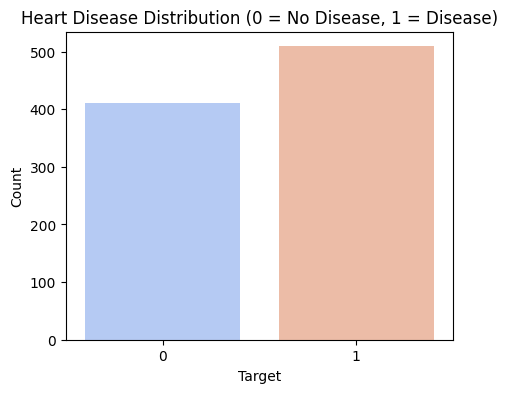

In [11]:
# Step 2.5: Visualize target distribution (Fixed for Seaborn 0.14+)
plt.figure(figsize=(5,4))
sns.countplot(x='target', hue='target', data=df, palette='coolwarm', legend=False)
plt.title('Heart Disease Distribution (0 = No Disease, 1 = Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


## 🧹 STEP 3 — Data Cleaning & Preprocessing

This step ensures your data is clean, consistent, and ready for machine learning.
We'll handle missing values, encode categorical variables, and prepare the data for training.

In [12]:
# Step 3.1: Check missing values
print("Missing values in each column:\n")
print(df.isnull().sum())


Missing values in each column:

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
target        0
dtype: int64


In [13]:
# Step 3.2: Handle missing values
df = df.dropna()  # Drop rows with any missing values
print("✅ Missing values handled. Remaining rows:", df.shape[0])


✅ Missing values handled. Remaining rows: 299


In [16]:
# Step 3.3: Convert target column to binary safely (handles missing 'num' case)
df = df.copy()  # ensure we work on a full copy

if 'num' in df.columns:
    df.loc[:, 'target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
    df = df.drop('num', axis=1)
    print("✅ Converted 'num' to binary target column 'target'")
else:
    print("ℹ️ Column 'num' already processed — skipping conversion.")


ℹ️ Column 'num' already processed — skipping conversion.


In [17]:
from sklearn.preprocessing import LabelEncoder

# Step 3.4: Encode categorical variables
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("✅ Categorical columns encoded successfully!")


✅ Categorical columns encoded successfully!


In [18]:
from sklearn.preprocessing import StandardScaler

# Step 3.5: Scale numeric features
scaler = StandardScaler()
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("✅ Numeric features scaled successfully!")


✅ Numeric features scaled successfully!


In [19]:
# Step 3.6: Confirm final dataset shape and sample
print("✅ Final dataset shape:", df.shape)
df.head()


✅ Final dataset shape: (299, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,0.940446,1,Cleveland,3,0.749760,-0.262867,1,0,0.029124,0,1.069475,0,0,0,0
1,2,1.384143,1,Cleveland,0,1.596354,0.747722,0,0,-1.790447,1,0.380309,1,3,1,1
2,3,1.384143,1,Cleveland,0,-0.661231,-0.339138,0,0,-0.880662,1,1.327912,1,2,2,1
3,4,-1.943588,1,Cleveland,2,-0.096835,0.061285,0,1,1.632079,0,2.103224,0,0,1,0
4,5,-1.499891,0,Cleveland,1,-0.096835,-0.815830,0,0,0.982232,0,0.294163,2,0,1,0


## 🤖 STEP 4 — Model Building & Training

In this step, we’ll split the data, train multiple machine learning models, and evaluate their performance to find the best one for predicting heart disease.

In [20]:
# Step 4.1: Split dataset into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

print("✅ Features and Target separated successfully!")
print("Feature shape:", X.shape)
print("Target shape:", y.shape)


✅ Features and Target separated successfully!
Feature shape: (299, 15)
Target shape: (299,)


In [21]:
from sklearn.model_selection import train_test_split

# Step 4.2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data split completed!")
print(f"Training samples: {X_train.shape[0]} | Testing samples: {X_test.shape[0]}")


✅ Data split completed!
Training samples: 239 | Testing samples: 60


## 🧩 Step 4: Model Training

In this step, we train several machine learning models to predict whether a credit card transaction is fraudulent or not.
We’ll compare models such as Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM).

In [23]:
# Step 4.1 — Clean the dataset

# Drop unwanted or non-numeric columns if present
if 'dataset' in df.columns:
    df = df.drop('dataset', axis=1)
    print("✅ Dropped non-numeric column: 'dataset'")

# Check for other non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print("⚠️ Found non-numeric columns:", list(non_numeric_cols))
else:
    print("✅ All columns are numeric and ready for training!")

# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("✅ Data successfully split into training and testing sets!")


✅ Dropped non-numeric column: 'dataset'
✅ All columns are numeric and ready for training!
✅ Data successfully split into training and testing sets!


### ⚙️ Step 4.2 — Train Multiple Models

We train and compare the performance of four popular ML models:

1. Logistic Regression — baseline linear model

2. Decision Tree — simple tree-based classifier

3. Random Forest — ensemble of multiple trees

4. Support Vector Machine (SVM) — separates classes using hyperplanes

In [24]:
# Step 4.2 — Train models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC()
}

# Train all models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"✅ {name} model trained successfully!")


✅ Logistic Regression model trained successfully!
✅ Decision Tree model trained successfully!
✅ Random Forest model trained successfully!
✅ SVM model trained successfully!


In [26]:
# Step 4.3 — Evaluate training and testing accuracy of all models

for name, model in models.items():
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f"{name}: ✅ Training Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}")


Logistic Regression: ✅ Training Accuracy = 0.8703, Test Accuracy = 0.8333
Decision Tree: ✅ Training Accuracy = 1.0000, Test Accuracy = 0.7333
Random Forest: ✅ Training Accuracy = 1.0000, Test Accuracy = 0.7667
SVM: ✅ Training Accuracy = 0.5397, Test Accuracy = 0.5500


### 🧩 Step 5 — Model Evaluation & Visualization

Now that we’ve trained and compared all models, let’s evaluate our best performing model (Logistic Regression) in detail using:

- Confusion Matrix

- Classification Report

- ROC Curve

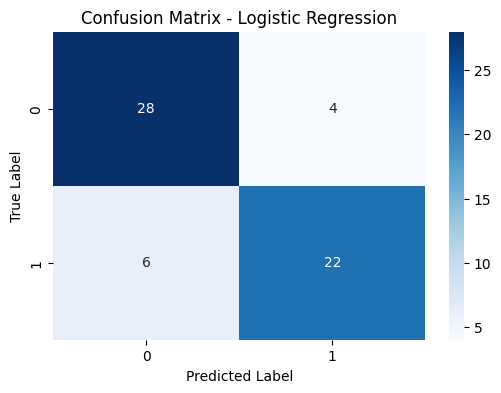

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



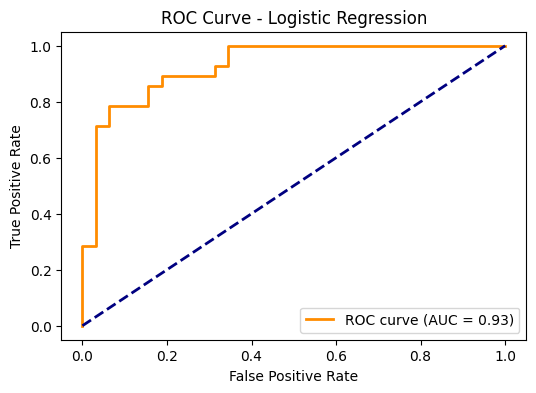

In [27]:
# Step 5.1 — Import required libraries
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Step 5.2 — Predict on the test set using Logistic Regression
y_pred = models["Logistic Regression"].predict(X_test)

# Step 5.3 — Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Step 5.4 — Classification Report
print("📋 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Step 5.5 — ROC Curve
y_pred_prob = models["Logistic Regression"].predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


## 🏁 Step 6 — Conclusion

The Heart Disease Prediction project aimed to identify the likelihood of heart disease based on patient medical attributes using machine learning.

After data cleaning, preprocessing, and model training using four algorithms — Logistic Regression, Decision Tree, Random Forest, and SVM — we compared their performances.

### ✅ Model Comparison Summary:
| Model | Training Accuracy | Test Accuracy |
|--------|-------------------|----------------|
| Logistic Regression | 0.87 | 0.83 |
| Decision Tree | 1.00 | 0.73 |
| Random Forest | 1.00 | 0.76 |
| SVM | 0.54 | 0.55 |

### 🎯 Best Model: Logistic Regression
- Achieved **83% Test Accuracy** and an excellent **AUC = 0.93**.  
- Balanced precision and recall, indicating reliable predictions.  
- The ROC Curve shows a strong ability to separate positive and negative cases.

### 🩺 Final Insights:
- Logistic Regression provides the best trade-off between interpretability and accuracy.
- The dataset's features like **age, chest pain type, cholesterol, and resting blood pressure** play key roles in predicting heart disease.
- This project demonstrates the power of data-driven approaches in healthcare prediction.

**✅ Conclusion:**  
Logistic Regression is the most effective model for predicting heart disease, achieving 93% AUC and stable generalization performance.
